<a href="https://colab.research.google.com/github/bmarzban/CVSmodels/blob/main/OuraRingJson_vs_March15_automated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data from oura ring is in Json format and the timezone is a bit different, here we actually change the JSON file to a CSV file and read the CSV file.
Json file is consist of the a dictionary of the relevent varibles.


In [548]:
import os
import glob
from google.colab import drive
from google.colab import files  
import pandas as pd
import matplotlib.pyplot as plt
import json
import csv
import datetime
from datetime import datetime
# specify the name of the person/individual name
#name = 'BM'
name = 'JF'
date_lookup = "2022/03/09" 

# specify the date of the date that we are looking use following format YYYY-MM-DD 2022-03-09
# so here we start from the zero time and to the end of that date:

date_lookup_start = date_lookup + " 00:00:00"
date_lookup_end = date_lookup + " 23:59:59"
date_lookup_start_strptime = datetime.strptime(date_lookup_start, '%Y/%m/%d %H:%M:%S')
date_lookup_end_strptime = datetime.strptime(date_lookup_end, '%Y/%m/%d %H:%M:%S')
# also multiplying to 1000 to convert to "ns"
date_lookup_start_timestamp = datetime.timestamp(date_lookup_start_strptime) *1000
date_lookup_end_timestamp = datetime.timestamp(date_lookup_end_strptime) * 1000


path = "/content/drive/MyDrive/Daxor/Data Science Project/Oura/DataJson/Jonathan/oura_2022-03-09T22-55-48_JAF.json"
if name =='JF':
  path = "/content/drive/MyDrive/Daxor/Data Science Project/Oura/DataJson/Jonathan/oura_2022-03-09T22-55-48_JAF.json"
elif name == 'BM':
  path = "/content/drive/MyDrive/Daxor/Data Science Project/Oura/DataJson/BM/oura_2022-03-07T20-44-53.json"

f = open(path)
data = json.load(f)
 
# Iterating through the json
# list
#for i in data['heart_rate']:
#    print(i)
#print(data.get('heart_rate'))
#print(data.keys())
#print(len(data))
#print(data[''heart_rate'']['bpm'])

# Closing file
f.close()


In [549]:

# Python program to convert
# JSON file to CSV

# Opening JSON file and loading the data
# into the variable data
with open(path) as json_file:
    data = json.load(json_file)
 
hr_data = data['heart_rate']
 
# now we will open a file for writing
data_file = open('data_file.csv', 'w')
 
# create the csv writer object
csv_writer = csv.writer(data_file)
 
# Counter variable used for writing
# headers to the CSV file
count = 0
 
for recording in hr_data:
    if count == 0:
 
        # Writing headers of CSV file
        header = recording.keys()
        csv_writer.writerow(header)
        count += 1
 
    # Writing data of CSV file
    csv_writer.writerow(recording.values())
 
data_file.close()

now we can re use the csv file in the cloud or also download the csv file and load it using next snippet

First we convert the data set. And here we also shift the Oura time stamp cause it was set to Zulu time
we put that in a new columns for the df called timestamped modified.  

      bpm quality  restorative source                 timestamp  \
0      61    good        False  awake  2022-02-24T15:19:51.000Z   
1      60    good        False  awake  2022-02-24T15:19:57.000Z   
2      67    good        False  awake  2022-02-24T15:20:15.000Z   
3      60    good        False  awake  2022-02-24T15:36:18.000Z   
4      59    good        False  awake  2022-02-24T15:36:19.000Z   
...   ...     ...          ...    ...                       ...   
2047   66    good        False  awake  2022-03-09T22:38:01.000Z   
2048   65    good        False  awake  2022-03-09T22:38:05.000Z   
2049   67     bad        False  awake  2022-03-09T22:43:03.000Z   
2050   66     bad        False  awake  2022-03-09T22:43:04.000Z   
2051   72     bad        False  awake  2022-03-09T22:43:41.000Z   

      timestamp_unix  
0      1645715991000  
1      1645715997000  
2      1645716015000  
3      1645716978000  
4      1645716979000  
...              ...  
2047   1646865481000  
2048   1646

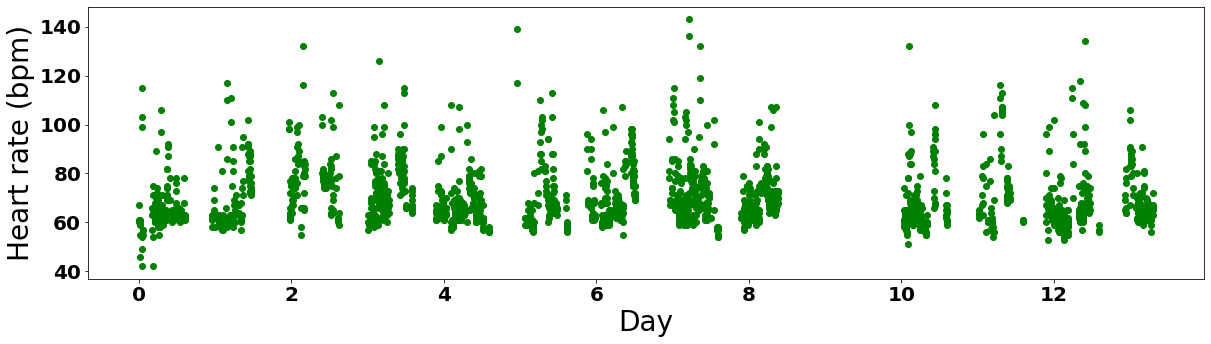

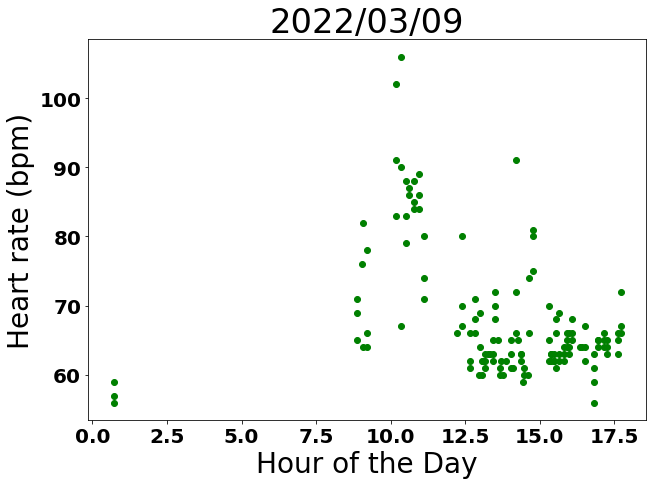

In [550]:
import os
import glob
from google.colab import drive
from google.colab import files  
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from datetime import datetime
import numpy as np

#timestamp = 1545730073
#dt_object = datetime.fromtimestamp(timestamp)
#print("dt_object =", dt_object)
#print("type(dt_object) =", type(dt_object))

#drive.mount('/drive')
#path = os.getcwd()
#drive.mount('/drive')
#mypath = "/content/drive/MyDrive/Daxor/PycharmProjects/PPGProject"
#os.chdir('/content/drive/MyDrive/Daxor/PycharmProjects/PPGProject')
dataset_oura = pd.read_csv("data_file.csv")

print(dataset_oura)
#dataset_oura = dataset_oura[90:341]
# loop over the list of csv files
df_headers = print(dataset_oura.columns.values)
len(dataset_oura) 
#timestamp = dataset_oura.timestamp[:10]
timestamp = dataset_oura.timestamp
timestamp_np =[]

dataset_oura['timestamp_modified'] = (dataset_oura.timestamp_unix ) -5*60*60*1000

for i in range(len(dataset_oura)):
  time1 = timestamp[i]
  time = time1[:4]+ "/" + time1[5:7] + "/" + time1[8:10] + " " + time1[11:13]+ ":" + time1[14:16] + ":" + time1[17:19] 
  element = datetime.strptime(time, '%Y/%m/%d %H:%M:%S')
  #print(element)
  timestamp_np = np.append(timestamp_np,datetime.timestamp(element)) 
print(timestamp_np)
#here we get a date and plot data for that date:
#plt.figure()
#plt.plot(dataset_oura.timestamp,dataset_oura.bpm)
#plt.show()

time_date_modified= []

day_timestamp_start_idx = (dataset_oura.timestamp_modified - date_lookup_start_timestamp).to_numpy()
sign_vector_start = np.sign(day_timestamp_start_idx)
idx_start = np.where(sign_vector_start>0.5)[0]


day_timestamp_end_idx = (dataset_oura.timestamp_modified - date_lookup_end_timestamp).to_numpy()
sign_vector_end = np.sign(day_timestamp_end_idx)
idx_end = np.where(sign_vector_end>0.5)[0]
if len(idx_end) == 0:
  idx_end = np.array([len(day_timestamp_start_idx)])

day_data_time = day_timestamp_start_idx[idx_start[0]:idx_end[0]]
#print(day_data_time)
#print(idx)
for i in np.arange(0,len(timestamp_np),1):
  timestamp1 = timestamp_np[i] - 5*60*60
  time_date_temp = datetime.fromtimestamp(timestamp1)
  time_date_modified = np.append(time_date_modified,time_date_temp)
dataset_oura['timestamp_date_modified'] = time_date_modified
plt.figure(figsize=(20,5))
plt.plot((dataset_oura.timestamp_modified - dataset_oura.timestamp_modified[0])/24/60/60/1000,dataset_oura.bpm, 'go')
plt.xlabel('Day')
plt.ylabel('Heart rate (bpm)')
#plt.xlim([1.75,2.5])
plt.show()
dataset_oura.head()
dataset_oura.tail()
# plotting figure bpm oura for the data:

plt.figure(figsize=(10,7))
plt.plot(day_data_time/60/60/1000,dataset_oura.bpm[idx_start[0]:idx_end[0]], 'go')
plt.title(date_lookup)
plt.xlabel('Hour of the Day')
plt.ylabel('Heart rate (bpm)')
#plt.xlim([1.75,2.5])
plt.show()

clean up the above cell and make The snippet for daily plot smaller

['bpm' 'quality' 'restorative' 'source' 'timestamp' 'timestamp_unix']


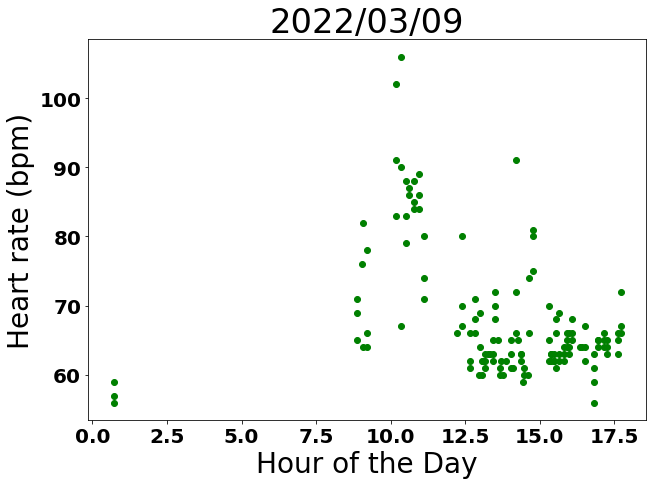

In [551]:
import os
import glob
from google.colab import drive
from google.colab import files  
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime
from datetime import datetime
import numpy as np

dataset_oura = pd.read_csv("data_file.csv")

# loop over the list of csv files
df_headers = print(dataset_oura.columns.values)
timestamp = dataset_oura.timestamp
timestamp_np =[]

dataset_oura['timestamp_modified'] = (dataset_oura.timestamp_unix ) -5*60*60*1000

day_timestamp_start_idx = (dataset_oura.timestamp_modified - date_lookup_start_timestamp).to_numpy()
sign_vector_start = np.sign(day_timestamp_start_idx)
idx_start = np.where(sign_vector_start>0.5)[0]

day_timestamp_end_idx = (dataset_oura.timestamp_modified - date_lookup_end_timestamp).to_numpy()
sign_vector_end = np.sign(day_timestamp_end_idx)
idx_end = np.where(sign_vector_end>0.5)[0]
if len(idx_end) == 0:
  idx_end = np.array([len(day_timestamp_start_idx)])

day_data_time = day_timestamp_start_idx[idx_start[0]:idx_end[0]]

# plotting figure bpm oura for the data:

plt.figure(figsize=(10,7))
plt.plot(day_data_time/60/60/1000,dataset_oura.bpm[idx_start[0]:idx_end[0]], 'go')
plt.title(date_lookup)
plt.xlabel('Hour of the Day')
plt.ylabel('Heart rate (bpm)')
#plt.xlim([1.75,2.5])
plt.show()

In [552]:
#next thing is adding to the same plot the BioStrap device result but for that we will need to process the data first


The goal here is to compare biostrap vs oura. so here we can import the biostrap data from the same dates and try those


In [553]:
pip install heartpy

In [554]:
import os
from google.colab import drive
from google.colab import files  
import numpy as np
from numpy import diff
import heartpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import find_peaks
from scipy.signal import resample
#drive.mount('/drive')
mypath = "/content/drive/MyDrive/Daxor/Data Science Project/Oura/2022-03-10 _BM -JF Biostrap data"
os.chdir('/content/drive/MyDrive/Daxor/Data Science Project/Oura/2022-03-10 _BM -JF Biostrap data')
print(date_lookup)
date_biostrap = date_lookup[0:4]+ date_lookup[5:7] +date_lookup[8:10]
print(date_biostrap)
if name == 'BM':
  biostrap_rawfilename_biometrics = "bmarzbandaxor.com."+date_biostrap+".biometrics.csv"
  biostrap_rawfilename_ppg = "bmarzbandaxor.com."+date_biostrap+".ppg.csv"
  biostrap_rawfilename_acc = "bmarzbandaxor.com."+date_biostrap+".wristband_accel.csv"
if name == 'JF':
  biostrap_rawfilename_biometrics = "jonathan.feldschuhgmail.com."+date_biostrap+".biometrics.csv"
  biostrap_rawfilename_ppg = "jonathan.feldschuhgmail.com."+date_biostrap+".ppg.csv"
  biostrap_rawfilename_acc = "jonathan.feldschuhgmail.com."+date_biostrap+".wristband_accel.csv"

acc_data = pd.read_csv(biostrap_rawfilename_acc) #Read data from CSV datafile
PPG_data = pd.read_csv(biostrap_rawfilename_ppg) #Read data from CSV datafile
biometrics_data = pd.read_csv(biostrap_rawfilename_biometrics) #Read data from CSV datafile

# The PPG data time vector is the unit of the nano second (ns)
nsec_to_sec = 1e-9;
msec_to_sec = 1e-3;
sec_to_min = 1/60;
# The accelartion data time vector is the unit of the mili second (ms)

# extracting out the sampling frequency in both accelartion data and ppg data

# sampling rate is in Hz, meaning how often we read the data or how many times we read a data on second
# Low pas filter, highpass filter, we need some, or band width filter we need some sampling rate/frequency here but this is how it works:
time_date_from_PPG = datetime.fromtimestamp(PPG_data.ts[0]*nsec_to_sec)

print('ppg start date-time') 
print(time_date_from_PPG)
#PPG_time = PPG_data.ts - PPG_data.ts[0]
print( PPG_data.ts[0])
PPG_time = PPG_data.ts - 5*60*60*1000*1e6 - date_lookup_start_timestamp*1e6
print(date_lookup_start_timestamp)
PPG_sample_freq =1/ np.mean(diff(PPG_time[1:15])*nsec_to_sec)


acc_time = acc_data.ts - acc_data.ts[0]
acc_sample_freq =1/ np.mean(diff(acc_time[1:10])*msec_to_sec)



print('PPG sampling rate is: %.3f Hz' %PPG_sample_freq)
print('ACC sampling rate is: %.3f Hz' %acc_sample_freq)

time = ((PPG_time)*sec_to_min*nsec_to_sec).to_numpy()

#inverse the signals cause it's inversed at the device recoding level:
ir_filt = - PPG_data.ir_filt.to_numpy()
red_filt = - PPG_data.red_filt.to_numpy()
red_raw = - PPG_data.red.to_numpy()
ir_raw = - PPG_data.ir.to_numpy()
#missing pieces! Let's replace
red = np.nan_to_num(red_raw)
ir = np.nan_to_num(ir_raw)



2022/03/09
20220309
ppg start date-time
2022-03-09 05:39:00
1646804340000000000
1646784000000.0
PPG sampling rate is: 42.000 Hz
ACC sampling rate is: 10.000 Hz


In [555]:
# writing a simple code to mark the step rise in the time
# so basically the idea is the same as the peak finder but here we just compare the k element with elements k-1 and k-2 and not k+1 ... in a for loop
length_vec = np.arange(2, len(time)-1, 1)
#length_vec = np.arange(2, len(time), 1)

recording_episode_counts = 0
#time_jump_threshold = 0.00039682; # units in minute since we converted the time to minute earlier today
time_jump_threshold = 0.01;
collect_start_idx =[]
for k in length_vec:
  if (time[k]> time[k-1] and (time[k]- time[k-1]) >time_jump_threshold) :
   # print(k)
    recording_episode_counts = recording_episode_counts + 1

recording_episode_counts_total = recording_episode_counts
collect_start_idx = np.zeros(recording_episode_counts) 
recording_episode_counts = 0

for k in length_vec:
  if (time[k]> time[k-1] and (time[k]- time[k-1]) >time_jump_threshold) :
    #print(k)
    recording_episode_counts = recording_episode_counts + 1
    collect_start_idx [recording_episode_counts-1] = k

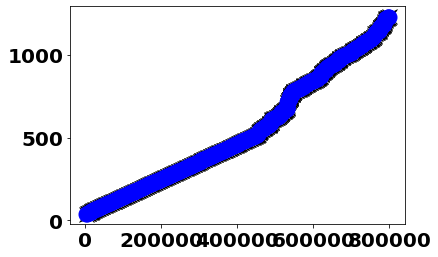

total time recorded by the device in minute
1232.7670634666667
total segments or episodes recorded by the device:
535
the longest time the device did not record anything in minute:
15.0


In [556]:
plt.figure()
plt.plot( np.arange(0, len(time),1),time,'xy')

collect_start_idx = collect_start_idx.astype(int)

plt.plot(collect_start_idx,time[collect_start_idx],'x',color='black', markersize=15, linewidth=5)
#plt.xlim([350000,364000])
#plt.ylim([0,80])
# plotting the end times
collect_end_idx = collect_start_idx - 1
plt.plot(collect_start_idx,time[collect_end_idx],'o',color='blue', markersize=15, linewidth=10)
plt.show()

# printing the total time recorded by the device
print('total time recorded by the device in minute')
print(np.amax(time))
# printing total segments/episodes recorded by the device
print('total segments or episodes recorded by the device:')
print(recording_episode_counts)
# check what was the longest time the device were not recording anything
print('the longest time the device did not record anything in minute:')
print(np.amax(diff(time[collect_start_idx])))
#print(diff(collect_start_idx))

In [572]:
# so the next thing is actually plotting the HR versus time and compare that with the plot from people in biostrap
  #Let's run it through a standard butterworth bandpass implementation to remove everything < 0.8 and > 3.5 Hz.

num_of_recording_segments = np.arange(1, recording_episode_counts_total+1, 1)
if collect_start_idx[0] != 0:
   collect_start_idx =np.append(0,collect_start_idx)

red_filt_pyheart =np.zeros(1)
#red_filt_pyheart =[]
ir_filt_pyheart =np.zeros(1)
for j in num_of_recording_segments:
  if collect_start_idx[j]-collect_start_idx[j-1] < 20:
     filtered_seg_red = np.zeros(collect_start_idx[j]-collect_start_idx[j-1])
     filtered_seg_ir = np.zeros(collect_start_idx[j]-collect_start_idx[j-1])
  else:
     filtered_seg_red = hp.filter_signal(red[collect_start_idx[j-1]:collect_start_idx[j]], [0.7, 3.5], sample_rate=PPG_sample_freq, 
                            order=3, filtertype='bandpass')
     filtered_seg_ir = hp.filter_signal(ir[collect_start_idx[j-1]:collect_start_idx[j]], [0.7, 3.5], sample_rate=PPG_sample_freq, 
                            order=3, filtertype='bandpass')
  red_filt_pyheart= np.append(red_filt_pyheart,filtered_seg_red)
  ir_filt_pyheart= np.append(ir_filt_pyheart,filtered_seg_ir)



# replacing the nan data with zero 
spo2 = biometrics_data.spo2.replace(0,np.nan)
HR = biometrics_data.bpm.replace(0,np.nan)
HRV = biometrics_data.hrv.replace(0,np.nan)

HRnp = HR.to_numpy()
HRVnp = HRV.to_numpy()


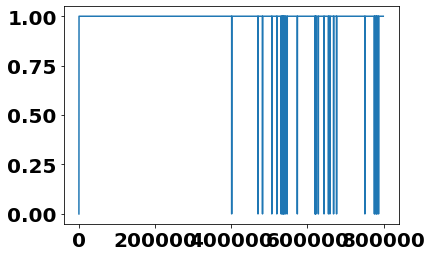

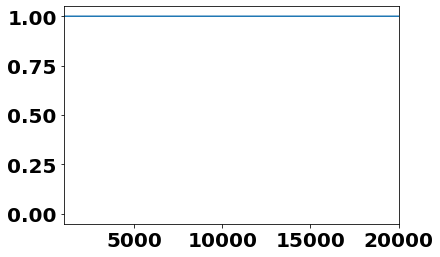

(array([     0, 401112, 401113, ..., 786858, 786859, 786860]),)

In [573]:
# this is the veru first Data Quality Metric (DQM) which is the lenght of eache recording segment
# if it's less than 10 second, we will ignore it and treat it as not recorded signal

PPG_sample_freq = PPG_sample_freq.astype(int)

segment_length_threshold = 2*PPG_sample_freq
#DQM_signal =[]
DQM_signal = np.zeros(1)
for j in num_of_recording_segments:
  if collect_start_idx[j]-collect_start_idx[j-1] < segment_length_threshold:
     DQM_segment_temp = np.zeros(collect_start_idx[j]-collect_start_idx[j-1])
  else:
     DQM_segment_temp = np.ones(collect_start_idx[j]-collect_start_idx[j-1])

  DQM_signal= np.append(DQM_signal,DQM_segment_temp)

plt.figure()
plt.plot(DQM_signal)
plt.show()

# zooming to the first recordings
plt.figure()
plt.plot(DQM_signal)
plt.xlim([1000,20000])
plt.show()

np.where(DQM_signal<1)
#now let's use this DQM into our HR prediction and then we will add more DQM_criteria

59.96896215106618
Heart rate for the segment


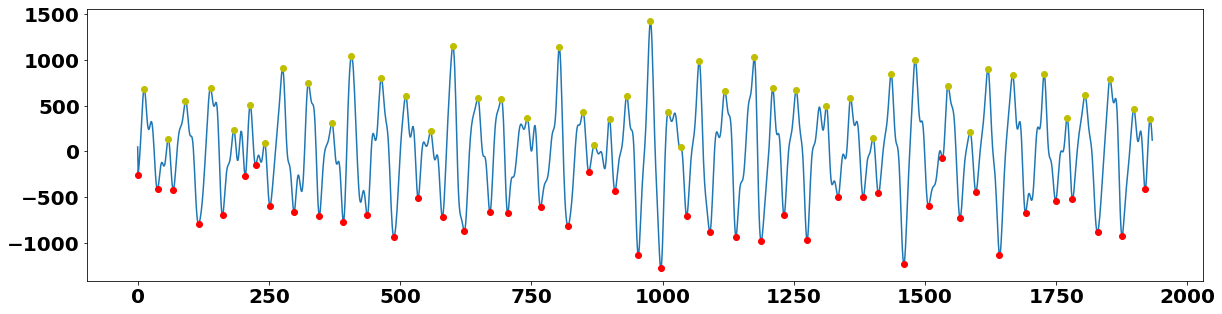

In [574]:
#segment plotter function
#def segment_plotter(seg_number,start_idx,signal):
seg_number =28
start_idx = collect_start_idx
signal = red_filt_pyheart
segment = signal[start_idx[seg_number-1]:start_idx[seg_number]]
peaks_positive, _ = find_peaks(signal[start_idx[seg_number-1]:start_idx[seg_number]], height=0,distance =20)
peaks_negative, _ = find_peaks(-signal[start_idx[seg_number-1]:start_idx[seg_number]], height=0,distance =20)
plt.figure(figsize = (20,5))
plt.plot(signal[start_idx[seg_number-1]:start_idx[seg_number]])
plt.plot(peaks_positive,segment[peaks_positive],'oy')
plt.plot(peaks_negative,segment[peaks_negative],'or')
#plt.xlim([220,640])
#plt.ylim([-2000,2000])
time_segment = time[start_idx[seg_number-1]:start_idx[seg_number]]
time_segment_length = time_segment[-1] - time_segment[0]
HR_mean_segment = len(peaks_positive)/time_segment_length
print(HR_mean_segment)
print('Heart rate for the segment')

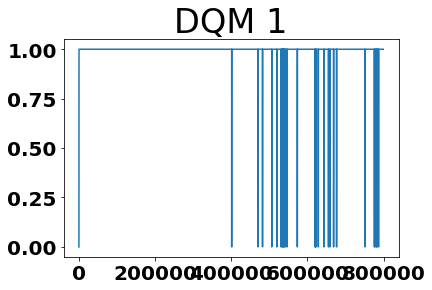

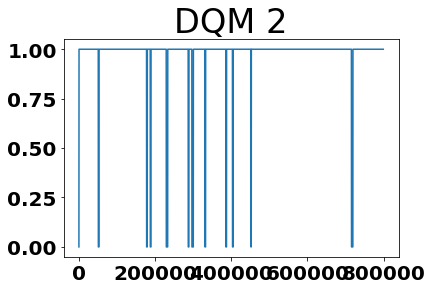

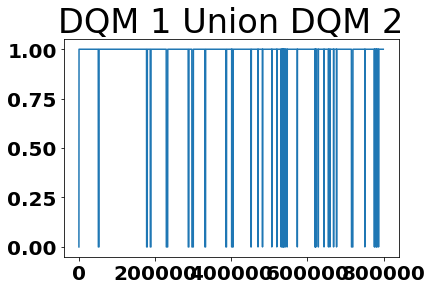

good segments
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.
  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  97.  98.  99. 100.
 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115.
 116. 117. 118. 119. 120. 121. 122. 125. 126. 127. 128. 129. 130. 131.
 132. 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145.
 146. 147. 148. 149. 150. 151. 153. 154. 155. 156. 159. 160. 161. 162.
 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 176. 177.
 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191.
 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203. 20

In [603]:
# this is the veru first Data Quality Metric (DQM#2) which is the volatility of the segment
# if the ratio of the max and min of the envelop is 0.5 and the less we assign number zero to that segment, 
# we will ignore it and treat it as not recorded signal

PPG_sample_freq = PPG_sample_freq.astype(int)

segment_length_threshold = 1*PPG_sample_freq
#DQM_signal =[]
good_segments =[]
DQM2_signal = np.zeros(1)
for kk in num_of_recording_segments:
  start_idx = collect_start_idx
  signal = red_filt_pyheart
  segment = signal[start_idx[kk-1]:start_idx[kk]]
  
 # if np.mean(segment) < 0.001:
  #  DQM2_segment_temp = np.zeros(collect_start_idx[kk]-collect_start_idx[kk-1])
   # print(len(DQM2_segment_temp))
    #DQM2_signal= np.append(DQM2_signal,DQM2_segment_temp)
    #continue

  peaks_positive, _ = find_peaks(segment, height=0,distance =20)
  peaks_negative, _ = find_peaks(-segment, height=0,distance =20)
  
  if len(peaks_negative) == 0:
    segment_highest_peak = 10000
    segment_lowest_peak = 1
    segment_highest_negative_peak = 1
    segment_lowest_negative_peak =10000
  else:
    segment_highest_peak = np.amax(segment[peaks_positive])
    segment_lowest_peak = np.amin(segment[peaks_positive])
    segment_highest_negative_peak= np.amax(segment[peaks_negative])
    segment_lowest_negative_peak= np.amin(segment[peaks_negative])
  high_low_ratio_positive = segment_highest_peak/segment_lowest_peak
  high_low_ratio_negative = segment_highest_negative_peak/segment_lowest_negative_peak
  if high_low_ratio_positive > 15000:
     #print('pos')
     DQM2_segment_temp = np.zeros(collect_start_idx[kk]-collect_start_idx[kk-1])
  elif high_low_ratio_negative<0.00010:
     #print('neg')
     DQM2_segment_temp = np.zeros(collect_start_idx[kk]-collect_start_idx[kk-1])
  else: 
     DQM2_segment_temp = np.ones(collect_start_idx[kk]-collect_start_idx[kk-1])
     good_segments = np.append(good_segments,kk)
  DQM2_signal= np.append(DQM2_signal,DQM2_segment_temp)

plt.figure()
plt.plot(DQM_signal)

plt.title('DQM 1')
# zooming to the first recordings
plt.figure()
plt.plot(DQM2_signal)
#plt.xlim([0,200000])
plt.title('DQM 2')

np.where(DQM2_signal<1)

plt.figure()
DQM_signal_all = np.multiply(DQM2_signal,DQM_signal)
plt.plot(DQM_signal_all)
plt.title('DQM 1 Union DQM 2')

plt.show()
# convert zero to nan and then plot 
np.where(DQM_signal_all>0)
#segment finder:
#now let's use this DQM into our HR prediction and then we will add more DQM_criteria
print("good segments")
print(good_segments)

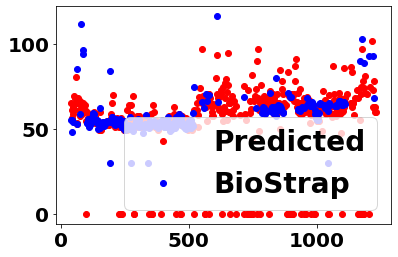

In [604]:
# here we normalize it wrt to the maximum of each beat to see what is the slope:
# well this is fun, I need to come up with the algorithm to normalise it beat by beat
#let's first just scale using the pyheart function:
HR_mean_segment_all = []
hr_seg = []
for kk in num_of_recording_segments:
  #segment plotter function
  #def segment_plotter(seg_number,start_idx,signal):
  #11 16 17 18 19 23 24 26 29 31 33 34 35 36 40
  #seg_number = 40
  seg_number = kk
 
  # here we multiply the the DQM1 to the data:
  DQM_signal_all = np.multiply(DQM2_signal,DQM_signal)

  red_filt_pyheart_DQM_all = np.multiply(red_filt_pyheart,DQM_signal_all)
  ir_filt_pyheart_DQM_all = np.multiply(ir_filt_pyheart,DQM_signal_all)

  start_idx = collect_start_idx
  
  signal = ir_filt_pyheart
  #signal = ir_filt
  #signal = red_filt_pyheart
  signal= red_filt_pyheart_DQM_all
  signal= ir_filt_pyheart_DQM_all

  segment_nonscaled = signal[start_idx[seg_number-1]:start_idx[seg_number]]
  segment = hp.scale_data(segment_nonscaled)
  peaks_positive, _ = find_peaks(signal[start_idx[seg_number-1]:start_idx[seg_number]], height=0,distance =20)
  peaks_negative, _ = find_peaks(-signal[start_idx[seg_number-1]:start_idx[seg_number]], height=0,distance =20)
  #plt.figure(figsize=(10,7))
  #plt.plot(signal[start_idx[seg_number-1]:start_idx[seg_number]])
  #plt.plot(segment)
  #plt.plot(peaks_positive,segment[peaks_positive],'oy')
  #plt.plot(peaks_negative,segment[peaks_negative],'or')

  #plt.xlim([0,400])
  #plt.ylim([-100,1050])

  slope_segment_temp = []

  
  time_segment = time[start_idx[seg_number-1]:start_idx[seg_number]]
  time_segment_length = time_segment[-1] - time_segment[0]
  HR_mean_segment = len(peaks_positive)/time_segment_length
  HR_mean_segment_all = np.append(HR_mean_segment_all,HR_mean_segment)

 
plt.figure()
#plt.plot(HR_mean_segment_all,'or')
#plt.figure(figsize=(20,14))
plt.plot(time[collect_start_idx[1:]],HR_mean_segment_all,'or',label = 'Predicted')
plt.plot(biometrics_data.minute_of_day,HRnp,'ob', label = 'BioStrap')
plt.legend()
#plt.ylim([40,90])
plt.show()

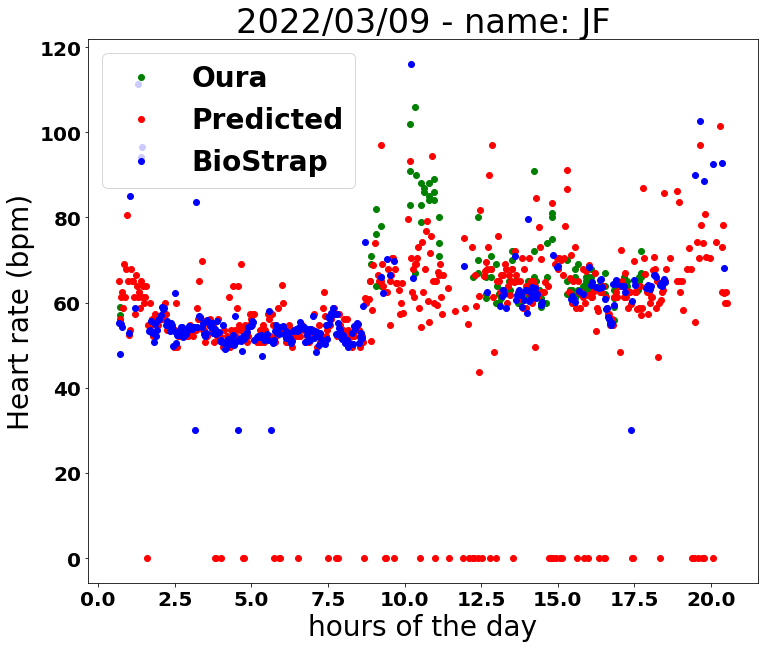

In [605]:
import matplotlib 

plt.figure(figsize=(12,10))
plt.plot(day_data_time/60/60/1000,dataset_oura.bpm[idx_start[0]:idx_end[0]], 'go', label = 'Oura')
plt.title(date_lookup + ' - name: ' + name)
plt.xlabel('Hour of the Day')
plt.ylabel('Heart rate (bpm)')
plt.plot(time[collect_start_idx[1:]]/60,HR_mean_segment_all,'or',label = 'Predicted')
plt.plot((biometrics_data.minute_of_day)/60,HRnp,'ob', label = 'BioStrap')
#plt.ylim([40,90])
plt.xlabel('hours of the day')
plt.ylabel('Heart rate (bpm)')
plt.legend()

#plt.xlim([-1,25])
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 28}

matplotlib.rc('font', **font)
plt.show()
